In [2]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from pandasgui import show
import numpy as np
import re
from collections import Counter,defaultdict
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
data = pd.read_csv('work_data.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)
data_ok = data.query("adapt==1")


# 数据转换

In [4]:
data_ok.head()

,id,key,name,salary,experience,edu_bg,location,company_name,industry,company_scale,responsibility,demand,string_feature,adapt
1,9247801,linux,值班业务运营 Linux运维工程师,8k-12k·13薪,经验1-3年,大专及以上,深圳,腾讯,"游戏,社交媒体,音频｜视频媒体",2000人以上,['1、值班业务处理：关注外部用户/合作方咨询投诉，关注内部业务监控告警，跟进支付/金融业务...,['1、***本科学历，有互联网运维、桌面运维、互联网产品运营/客服、互联网支付金融行业工作...,"['值班', '业务', '关注', '外部', '用户', '合作方', '咨询', '投...",1.0
2,9762662,linux,linux开发工程师,12k-24k,经验1-3年,本科及以上,北京,中安星云,"信息安全,数据服务",50-150人,['岗位职责： 1. 负责Linux环境下C/C++ 程序的开发； 2. 根据需求完成模块设...,[],"['岗位职责', '负责', 'linux', '环境', '程序', '开发', '需求'...",1.0
3,9771455,linux,linux运维工程师,20k-40k·13薪,经验1-3年,本科及以上,上海,得越信息,"区块链,科技金融,金融业",50-150人,"['1.在AWS Cloud环境中进行应用的部署，并负责维护网站的可靠性；', '2.负责公...","['1.计算机相关专业，对安全、DevOps有浓厚兴趣，具备3年及以上云运维相关经验；', ...","['aws', 'cloud', '环境', '部署', '负责', '维护', '网站',...",1.0
4,9359369,linux,嵌入式Linux软件工程师(XZ2...,12k-20k,在校,应届,上海,收钱吧,移动互联网,2000人以上,"['1.本科及以上学历，计算机、电子、通信、自动化类相关专业', '2.熟悉计算机原理及接口...",[],"['本科', '计算机', '电子', '通信', '自动化', '相关', '专业', '...",1.0
5,9579791,linux,Linux BSP 高级研发工程师,30k-55k·15薪,经验5-10年,本科及以上,上海,滴滴,旅游｜出行,2000人以上,['岗位职责：1、负责Android平台HAL层、BSP驱动和BOOT的开发；2、负责HAL...,[],"['岗位职责', '负责', 'android', '平台', 'hal', 'bsp', ...",1.0


In [5]:
def get_salary(x):
    split1 = x.split('·')
    split2 = split1[0].split('-')
    fisrt_salary = float(split2[0][:-1])
    second_salary = float(split2[1][:-1])
    if len(split1)==2:
        salry_months = float(split1[1][:-1])
        salary = (fisrt_salary+second_salary)*salry_months/24
        return round(salary,1)
    else:
        salary = (fisrt_salary+second_salary)/2
        return round(salary,1)
salary  = data_ok.salary.map(get_salary)
#salary = np.array(salary).reshape(-1,1)
data_ok.loc[:,'month_salary'] = salary
data_ok.loc[(data_ok.query("experience=='在校'")).index,'experience']='经验不限'

#整理industry
def get_industry(x):
    pattern = r'[｜、,| 丨]'
    x = re.sub(pattern,' ',x)
    x = x.split(' ')
    return x
data_ok.loc[:,'industry'] = data_ok.industry.map(get_industry)

In [6]:
data_ok.head()

,id,key,name,salary,experience,edu_bg,location,company_name,industry,company_scale,responsibility,demand,string_feature,adapt,month_salary
1,9247801,linux,值班业务运营 Linux运维工程师,8k-12k·13薪,经验1-3年,大专及以上,深圳,腾讯,"[游戏, 社交媒体, 音频, 视频媒体]",2000人以上,['1、值班业务处理：关注外部用户/合作方咨询投诉，关注内部业务监控告警，跟进支付/金融业务...,['1、***本科学历，有互联网运维、桌面运维、互联网产品运营/客服、互联网支付金融行业工作...,"['值班', '业务', '关注', '外部', '用户', '合作方', '咨询', '投...",1.0,10.8
2,9762662,linux,linux开发工程师,12k-24k,经验1-3年,本科及以上,北京,中安星云,"[信息安全, 数据服务]",50-150人,['岗位职责： 1. 负责Linux环境下C/C++ 程序的开发； 2. 根据需求完成模块设...,[],"['岗位职责', '负责', 'linux', '环境', '程序', '开发', '需求'...",1.0,18.0
3,9771455,linux,linux运维工程师,20k-40k·13薪,经验1-3年,本科及以上,上海,得越信息,"[区块链, 科技金融, 金融业]",50-150人,"['1.在AWS Cloud环境中进行应用的部署，并负责维护网站的可靠性；', '2.负责公...","['1.计算机相关专业，对安全、DevOps有浓厚兴趣，具备3年及以上云运维相关经验；', ...","['aws', 'cloud', '环境', '部署', '负责', '维护', '网站',...",1.0,32.5
4,9359369,linux,嵌入式Linux软件工程师(XZ2...,12k-20k,经验不限,应届,上海,收钱吧,[移动互联网],2000人以上,"['1.本科及以上学历，计算机、电子、通信、自动化类相关专业', '2.熟悉计算机原理及接口...",[],"['本科', '计算机', '电子', '通信', '自动化', '相关', '专业', '...",1.0,16.0
5,9579791,linux,Linux BSP 高级研发工程师,30k-55k·15薪,经验5-10年,本科及以上,上海,滴滴,"[旅游, 出行]",2000人以上,['岗位职责：1、负责Android平台HAL层、BSP驱动和BOOT的开发；2、负责HAL...,[],"['岗位职责', '负责', 'android', '平台', 'hal', 'bsp', ...",1.0,53.1


In [ ]:
show(data_ok)

# 数据可视化

## 关于薪资单变量的数据可视化

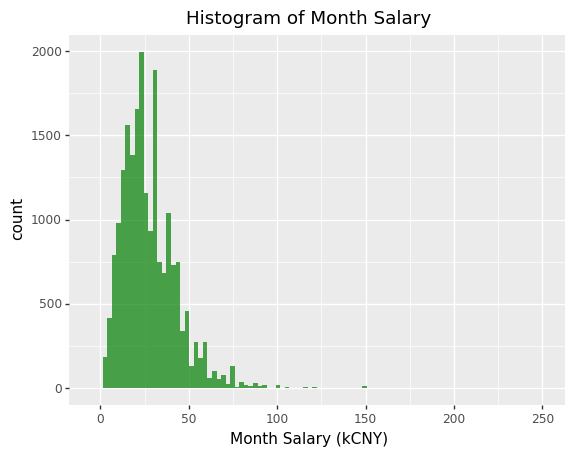

<ggplot: (160529572024)>

In [8]:
#绘制薪资直方图
(ggplot(data_ok, aes(x='month_salary')) 
 + geom_histogram(bins=100,fill='green',alpha=0.7)
 + scale_x_continuous(breaks=np.arange(0,300,50),limits=(-5,250),name = 'Month Salary (kCNY)') #breaks粗网格位置
 + labs(title='Histogram of Month Salary')
)

Text(0.5, 0, 'Month Salary (kCNY)')

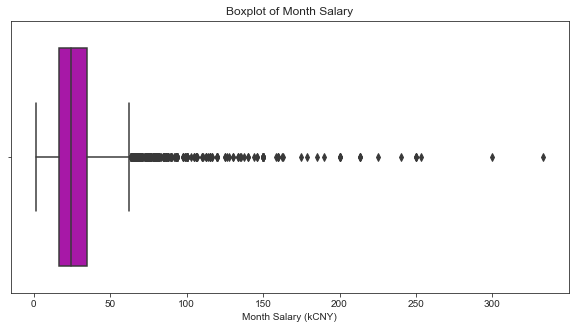

In [11]:
#绘制薪资箱型图

sns.set_style("ticks")
sns.set_palette("pastel")
f, axs = plt.subplots( figsize=(10, 5))
plt.title('Boxplot of Month Salary')
sns.boxplot(data=data_ok,x='month_salary',ax = axs,color='m')
axs.set_xlabel('Month Salary (kCNY)')

In [96]:
data_ok.month_salary.describe()

count    20540.000000
mean        27.877210
std         17.177118
min          1.500000
25%         16.500000
50%         24.500000
75%         35.000000
max        333.300000
Name: month_salary, dtype: float64

## 关于薪资根据其他变量分类数据可视化

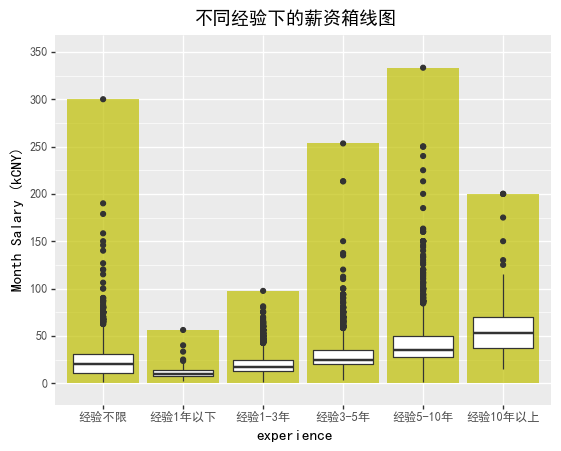

<ggplot: (160531756120)>

In [22]:
#薪资根据经验分类
category = pd.api.types.CategoricalDtype(categories= ['经验不限', '经验1年以下','经验1-3年', '经验3-5年','经验5-10年',  '经验10年以上'],ordered=True)
data_ok['experience']=data_ok['experience'].astype(category)
(
    ggplot(data_ok, aes(x='experience', y='month_salary'))
    
    +stat_summary(fun_y = np.max, geom="bar",fill='y',alpha=0.7)
    + geom_boxplot()
    +theme_grey(base_family = "SimHei")
    + scale_y_continuous(breaks=np.arange(0,400,50),limits=(-5,350),name = 'Month Salary (kCNY)') #breaks粗网格位置
    +labs(title='不同经验下的薪资箱线图')
    
)

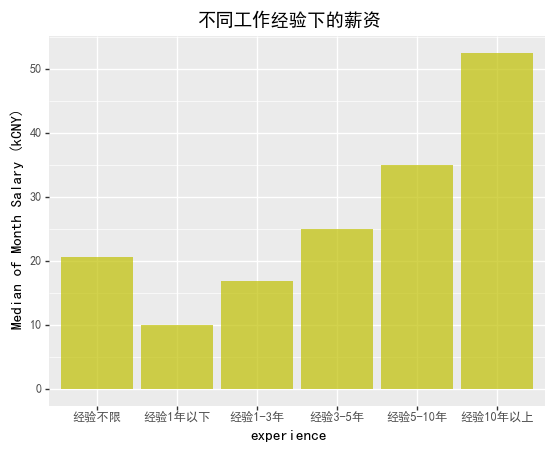

<ggplot: (160531688801)>

In [21]:
#中位数条形图
(
    ggplot(data_ok, aes(x='experience', y='month_salary'))
    +stat_summary(fun_y = np.median, geom="bar",fill='y',alpha=0.7)
    +theme_grey(base_family = "SimHei")
    +scale_y_continuous(name = 'Median of Month Salary (kCNY)') #breaks粗网格位置
    +labs(title='不同经验下的薪资中位数')
)

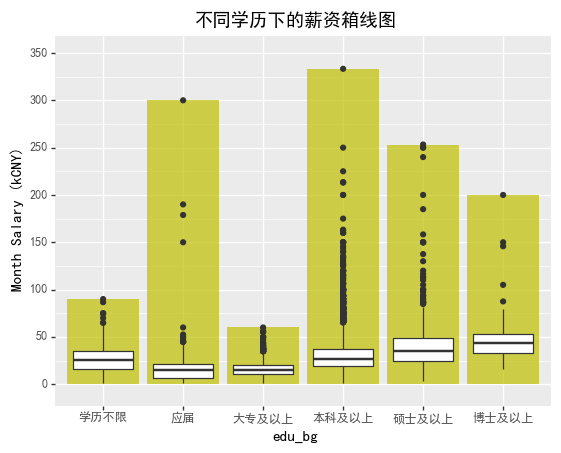

<ggplot: (160531236789)>

In [23]:
#薪资根据学历分类

category = pd.api.types.CategoricalDtype(categories= ['学历不限','应届','大专及以上', '本科及以上', '硕士及以上', '博士及以上'],ordered=True)
data_ok['edu_bg']=data_ok['edu_bg'].astype(category)
(
    ggplot(data_ok, aes(x='edu_bg', y='month_salary'))
    +stat_summary(fun_y = np.max, geom="bar",fill='y',alpha=0.7)
    + geom_boxplot()
    +theme_grey(base_family = "SimHei")
    + scale_y_continuous(breaks=np.arange(0,400,50),limits=(-5,350),name = 'Month Salary (kCNY)') #breaks粗网格位置
    +labs(title='不同学历下的薪资箱线图')
)
    

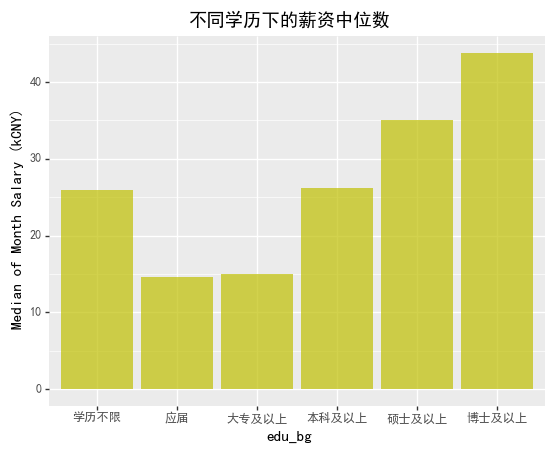

<ggplot: (160531193462)>

In [24]:
#中位数条形图
(
    ggplot(data_ok, aes(x='edu_bg', y='month_salary'))
    +stat_summary(fun_y = np.median, geom="bar",fill='y',alpha=0.7)
    +theme_grey(base_family = "SimHei")
    + scale_y_continuous(name = 'Median of Month Salary (kCNY)') 
    +labs(title='不同学历下的薪资中位数')
)

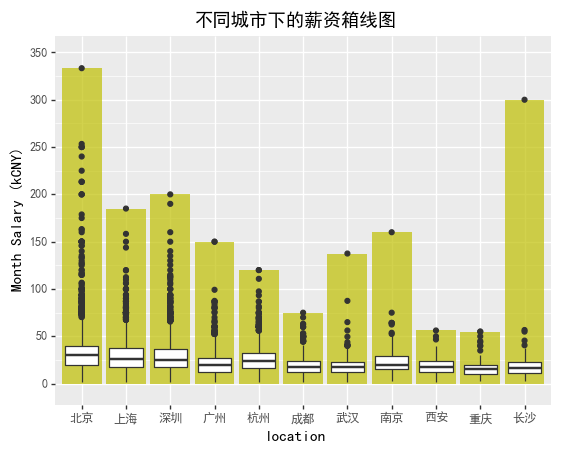

<ggplot: (160551940473)>

In [64]:
#薪资根据城市分类
pieces=dict(list(data_ok.groupby(['location'])))
location_count = (data_ok.groupby(['location'])).count()['id'].sort_values(ascending=False)
num = 0
citys = []
for i in range(location_count.shape[0]):
    num += location_count.iloc[i]
    citys.append(location_count.index[i])
    if num > 0.95*location_count.sum():
        break
#citys存储了包含95%的工作的城市名
category = pd.api.types.CategoricalDtype(categories= ['北京', '上海', '深圳', '广州', '杭州', '成都', '武汉', '南京', '西安', '重庆', '长沙'],ordered=True)
data_ok['location']=data_ok['location'].astype(category)
temp = data_ok.query("location in ['北京', '上海', '深圳', '广州', '杭州', '成都', '武汉', '南京', '西安', '重庆', '长沙']")
(
    ggplot(temp, aes(x='location', y='month_salary'))
    +stat_summary(fun_y = np.max, geom="bar",fill='y',alpha=0.7)
    + geom_boxplot()
    +theme_grey(base_family = "SimHei")
    + scale_y_continuous(breaks=np.arange(0,400,50),limits=(-5,350),name = 'Month Salary (kCNY)') #breaks粗网格位置
    +labs(title='不同城市下的薪资箱线图')
)


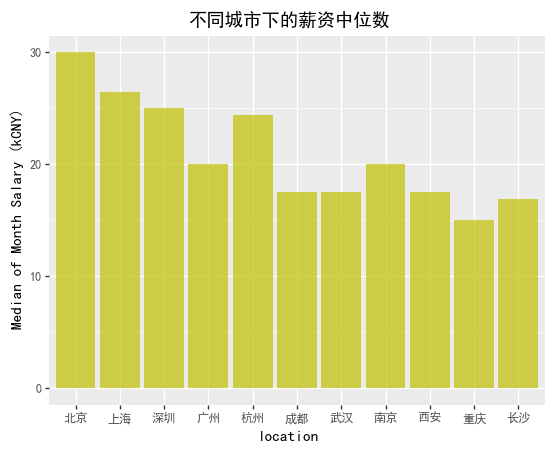

<ggplot: (160531399771)>

In [65]:
#中位数条形图
(
    ggplot(temp, aes(x='location', y='month_salary'))
    +stat_summary(fun_y = np.median, geom="bar",fill='y',alpha=0.7)
    +theme_grey(base_family = "SimHei")
    + scale_y_continuous(name = 'Median of Month Salary (kCNY)') #breaks粗网格位置
    +labs(title='不同城市下的薪资中位数')
)

In [26]:
#薪资根据行业分类
#industrys = list(set(data_ok.industry.sum()))
group_by_industry = defaultdict(list)
for i in data_ok.index:
    for industry in data_ok.loc[i,'industry']:        
        group_by_industry[industry].append(data_ok.loc[i,'month_salary'])
industry_data= dict(Counter(group_by_industry))
#进行一些处理
del(industry_data['咨询'])
industry_data['人工智能'] = industry_data['人工智能服务']+industry_data['人工智能']
del(industry_data['人工智能服务'])
industry_data_sorted = sorted(industry_data.items(), key= lambda x : len(x[1]), reverse=True)[:53]#职位>53的数据


In [27]:
salary_mdedian = [(i[0],round(np.median(i[1]),2),len(i[1])) for i in industry_data_sorted ]
salary_mdedian = DataFrame(salary_mdedian,columns=['行业','薪资中位数','数量'])
salary_mdedian = salary_mdedian.sort_values(by='薪资中位数',ascending=True)
salary_mdedian['行业'] = pd.Categorical(salary_mdedian['行业'], salary_mdedian['行业'], ordered=True) 

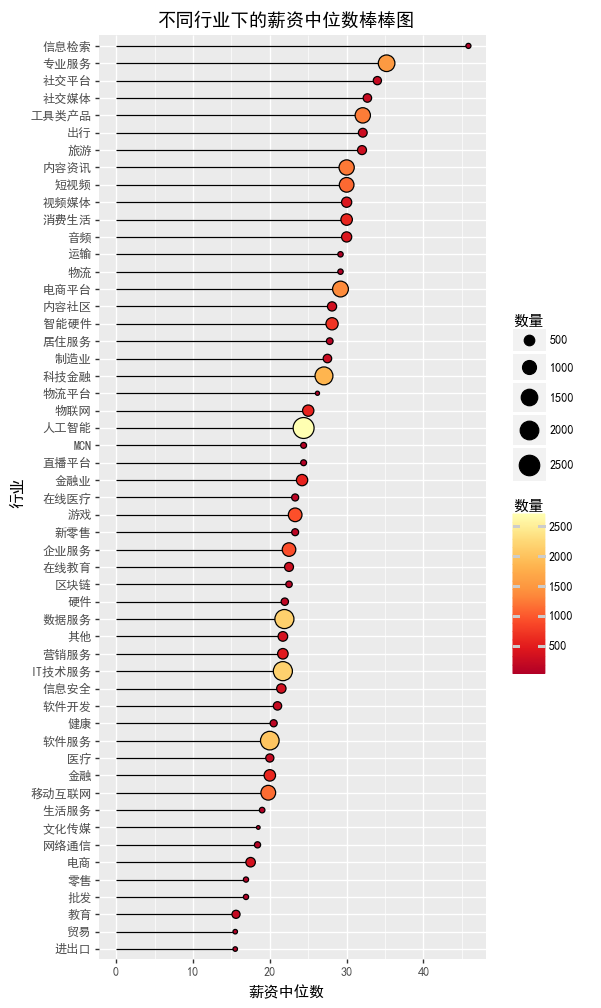

<ggplot: (160531518121)>

In [59]:
(
    ggplot(salary_mdedian, aes('薪资中位数', '行业','数量'))
    + geom_segment(aes(x=0, xend='薪资中位数', y='行业', yend='行业'))
    + geom_point(aes(size='数量',fill='数量'),shape='o', color='k')
    + theme_grey(base_family = "SimHei")
    + theme(figure_size =(5,12))
    + scale_size(range=(1,8))
    + scale_fill_distiller(type='seq', palette=0)
    +labs(title='不同行业下的薪资中位数棒棒图')
    
)

## 提取英文单词构造词云，较大的词需求较大的技术


In [29]:
words = ''
for i in data_ok['string_feature'].index:
    words += (re.sub( r'[\[ \] \']','',data_ok.loc[i,'string_feature'])+',')
words = words.split(',')

In [30]:
string = ''
for word in words:
    if re.match(r'[a-z]',word)  and re.search(r'[\u4e00-\u9fa5]',word)==None and word !='xa':
        string += (word+' ')

In [31]:
import chardet
import jieba
import numpy as np
from PIL import Image
import os
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc


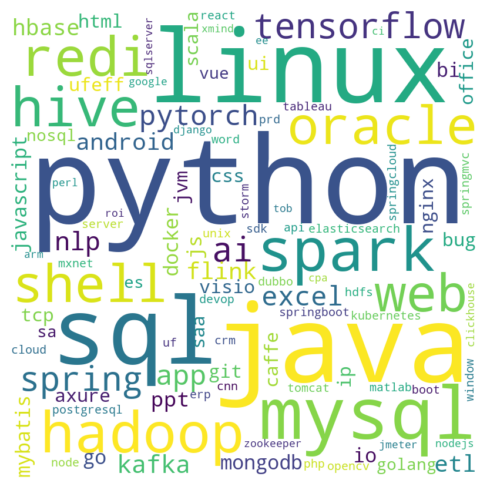

In [66]:

# 获取文本text
text = string
# 生成词云

wc=WordCloud(font_path=None,  # 字体路径，英文不用设置路径，中文需要，否则无法正确显示图形
    width=400, # 默认宽度
    height=400, # 默认高度
    margin=2, # 边缘
    ranks_only=None, 
    prefer_horizontal=0.9, 
    mask=None, # 背景图形，如果想根据图片绘制，则需要设置
    scale=2, 
    color_func=None, 
    max_words=100, # 最多显示的词汇量
    min_font_size=4, # 最小字号
    stopwords=None, # 停止词设置，修正词云图时需要设置
    random_state=None, 
    background_color='white', # 背景颜色设置，可以为具体颜色,比如white或者16进制数值
    max_font_size=None, # 最大字号
    font_step=1, 
    mode='RGB', 
    relative_scaling='auto', 
    regexp=None, 
    collocations=False, 
    #colormap='Reds', # matplotlib 色图，可更改名称进而更改整体风格
    normalize_plurals=True, 
    contour_width=0, 
    contour_color='black', 
    repeat=False)

wc.generate_from_text(text)
# 显示图像

fig = figure(figsize=(5,5),dpi =100)  
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()



## 提取工作名构造词云

In [37]:
words = ''
for i in data_ok['name'].index:
    words += (re.sub( r'[\[ \] \']','',data_ok.loc[i,'name'])+' ')
#words = words.split(',')

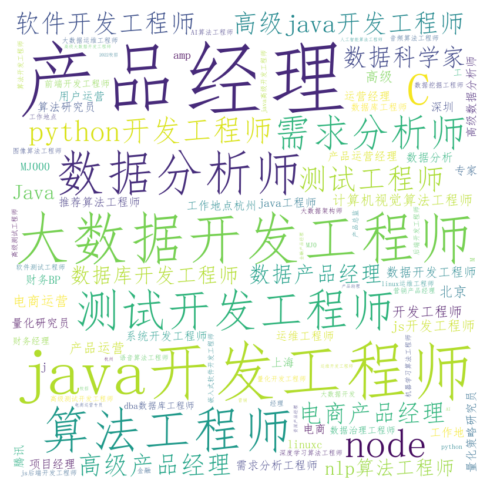

In [62]:

# 获取文本text
text = words
# 生成词云

wc=WordCloud(font_path='C:\Windows\Fonts\simfang.ttf',  # 字体路径，英文不用设置路径，中文需要，否则无法正确显示图形
    width=400, # 默认宽度
    height=400, # 默认高度
    margin=2, # 边缘
    ranks_only=None, 
    prefer_horizontal=0.9, 
    mask=None, # 背景图形，如果想根据图片绘制，则需要设置
    scale=2, 
    color_func=None, 
    max_words=100, # 最多显示的词汇量
    min_font_size=4, # 最小字号
    stopwords=None, # 停止词设置，修正词云图时需要设置
    random_state=None, 
    background_color='white', # 背景颜色设置，可以为具体颜色,比如white或者16进制数值
    max_font_size=None, # 最大字号
    font_step=1, 
    mode='RGB', 
    relative_scaling='auto', 
    regexp=None, 
    collocations=False, 
    #colormap='Reds', # matplotlib 色图，可更改名称进而更改整体风格
    normalize_plurals=True, 
    contour_width=0, 
    contour_color='black', 
    repeat=False)

wc.generate_from_text(text)
# 显示图像

fig = figure(figsize=(5,5),dpi =100)  
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

